In [82]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [83]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, inspect, func

In [84]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [86]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)
Dow = Base.classes.measurement

In [88]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [91]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<AxesSubplot:xlabel='date'>

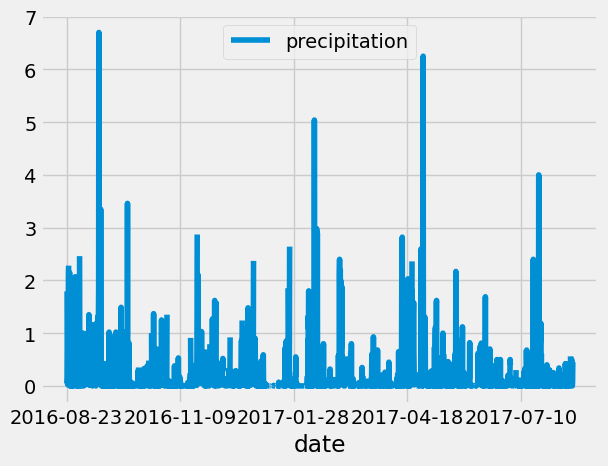

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12_months = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = []
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date>=last_12_months).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(scores, columns =['date','precipitation'])
df.set_index(df['date'], inplace = True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()



In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all() 

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calculate = active_stations[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == calculate).all()

[(54.0, 71.66378066378067, 85.0)]

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == calculate).\
    filter(measurement.date >= last_12_months).all()

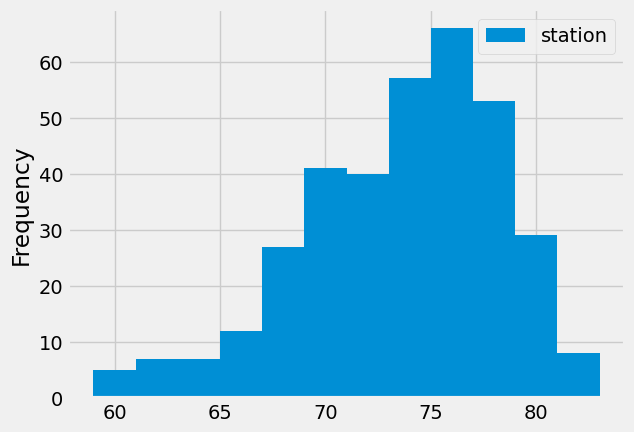

In [110]:
# plot the results as a histogram
df = pd.DataFrame(most_recent_date_station, columns=['measurement','station'])
df.head()
df.plot.hist(bins= 12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()